In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

#Data standarization 
from sklearn.preprocessing import StandardScaler

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

In [2]:
dataset=pd.read_excel("Des_cod_1056_255-92.xlsx",index_col=0)

In [3]:
dataset.head()

,Number of atoms,Relative number of C atoms,Relative number of H atoms,Number of O atoms,Number of N atoms,Relative number of N atoms,Number of F atoms,Number of Cl atoms,Relative number of Cl atoms,Number of Br atoms,...,Min valency of a C atom,Max valency of a C atom,Avg valency of a C atom,Min (>0.1) bond order of a C atom,Max bond order of a C atom,Avg bond order of a C atom,Avg valency of a H atom,Min (>0.1) bond order of a H atom,Max bond order of a H atom,Act
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101,0.4950,0.4455,0,3,0.0297,0,2,0.0198,0,...,3.8081,4.0061,3.9443,0.1060,1.5632,1.0522,0.9464,0.8012,0.9305,0.853
"""2Co""",107,0.4860,0.4579,0,3,0.0280,0,2,0.0187,0,...,3.8120,4.0061,3.9421,0.1051,1.5502,1.0467,0.9481,0.1318,0.9370,0.987
"""3Co""",113,0.4779,0.4690,0,3,0.0265,0,2,0.0177,0,...,3.8083,4.0060,3.9419,0.1012,1.5626,1.0260,0.9472,0.7988,0.9389,0.773
"""4Co""",104,0.4904,0.4519,0,3,0.0288,0,2,0.0192,0,...,3.8082,4.0062,3.9431,0.1057,1.5634,1.0501,0.9462,0.8024,0.9320,0.760
"""5Co""",110,0.4818,0.4636,0,3,0.0273,0,2,0.0182,0,...,3.8127,4.0062,3.9410,0.1048,1.5509,1.0444,0.9480,0.1275,0.9375,0.893


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, "1Co" to "1056Co"
Data columns (total 93 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Number of atoms                                                        1056 non-null   int64  
 1   Relative number of C  atoms                                            1056 non-null   float64
 2   Relative number of H  atoms                                            1056 non-null   float64
 3   Number of O  atoms                                                     1056 non-null   int64  
 4   Number of N  atoms                                                     1056 non-null   int64  
 5   Relative number of N  atoms                                            1056 non-null   float64
 6   Number of F  atoms                                                     1056 non-null 

In [5]:
dataset.shape

(1056, 93)

In [6]:
# to check the null values 
dataset.isnull().sum()

Number of atoms                      0
Relative number of C  atoms          0
Relative number of H  atoms          0
Number of O  atoms                   0
Number of N  atoms                   0
                                    ..
Avg bond order of a C atom           0
Avg valency of a H atom              0
Min (>0.1) bond order of a H atom    0
Max bond order of a H atom           0
Act                                  0
Length: 93, dtype: int64

In [7]:
dataset.isnull().count()

Number of atoms                      1056
Relative number of C  atoms          1056
Relative number of H  atoms          1056
Number of O  atoms                   1056
Number of N  atoms                   1056
                                     ... 
Avg bond order of a C atom           1056
Avg valency of a H atom              1056
Min (>0.1) bond order of a H atom    1056
Max bond order of a H atom           1056
Act                                  1056
Length: 93, dtype: int64

In [8]:
#independent and dependent features
x = dataset.drop(['Act'],axis=1).astype(float)

In [9]:
x

,Number of atoms,Relative number of C atoms,Relative number of H atoms,Number of O atoms,Number of N atoms,Relative number of N atoms,Number of F atoms,Number of Cl atoms,Relative number of Cl atoms,Number of Br atoms,...,Avg bond order of a N atom,Min valency of a C atom,Max valency of a C atom,Avg valency of a C atom,Min (>0.1) bond order of a C atom,Max bond order of a C atom,Avg bond order of a C atom,Avg valency of a H atom,Min (>0.1) bond order of a H atom,Max bond order of a H atom
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101.0,0.4950,0.4455,0.0,3.0,0.0297,0.0,2.0,0.0198,0.0,...,0.9679,3.8081,4.0061,3.9443,0.1060,1.5632,1.0522,0.9464,0.8012,0.9305
"""2Co""",107.0,0.4860,0.4579,0.0,3.0,0.0280,0.0,2.0,0.0187,0.0,...,0.9651,3.8120,4.0061,3.9421,0.1051,1.5502,1.0467,0.9481,0.1318,0.9370
"""3Co""",113.0,0.4779,0.4690,0.0,3.0,0.0265,0.0,2.0,0.0177,0.0,...,0.9641,3.8083,4.0060,3.9419,0.1012,1.5626,1.0260,0.9472,0.7988,0.9389
"""4Co""",104.0,0.4904,0.4519,0.0,3.0,0.0288,0.0,2.0,0.0192,0.0,...,0.9675,3.8082,4.0062,3.9431,0.1057,1.5634,1.0501,0.9462,0.8024,0.9320
"""5Co""",110.0,0.4818,0.4636,0.0,3.0,0.0273,0.0,2.0,0.0182,0.0,...,0.9649,3.8127,4.0062,3.9410,0.1048,1.5509,1.0444,0.9480,0.1275,0.9375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""1052Co""",86.0,0.4535,0.4767,0.0,3.0,0.0349,0.0,2.0,0.0233,0.0,...,0.9758,3.8315,4.0045,3.9422,0.1027,1.7105,1.0671,0.9584,0.8971,0.9441
"""1053Co""",74.0,0.4730,0.4459,0.0,3.0,0.0405,0.0,2.0,0.0270,0.0,...,0.9784,3.8315,4.0045,3.9453,0.1013,1.7119,1.0658,0.9570,0.8972,0.9414
"""1054Co""",80.0,0.4625,0.4625,0.0,3.0,0.0375,0.0,2.0,0.0250,0.0,...,0.9773,3.8315,4.0045,3.9421,0.1028,1.7119,1.0737,0.9544,0.8757,0.9413


In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1056 entries, "1Co" to "1056Co"
Data columns (total 92 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Number of atoms                                                        1056 non-null   float64
 1   Relative number of C  atoms                                            1056 non-null   float64
 2   Relative number of H  atoms                                            1056 non-null   float64
 3   Number of O  atoms                                                     1056 non-null   float64
 4   Number of N  atoms                                                     1056 non-null   float64
 5   Relative number of N  atoms                                            1056 non-null   float64
 6   Number of F  atoms                                                     1056 non-null 

In [11]:
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [12]:
y = dataset.loc [:, "Act"]

In [13]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [14]:
## to overcome the problem input contains nan infinity or a value too large for dtype('float64').
## We need to cinvert the pandas dataframe to numpy array 
X = np.nan_to_num(x)

In [15]:
X.shape 

(1056, 92)

In [16]:
## to overcome the problem input contains nan infinity or a value too large for dtype('float64'). 
Y =np.nan_to_num(y)

In [17]:
Y.shape 

(1056,)

In [18]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [120]:
# Train -test split 
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=.2, random_state = 27, shuffle=True)

In [121]:
#x_model, x_extest, y_model, y_extest = train_test_split(X,Y,test_size=.2, random_state = 7000, shuffle=True)

In [122]:
#x_train, x_test2, y_train, y_test2 = train_test_split(x_model,y_model,test_size=.3, random_state = 7000, shuffle=True)

In [123]:
#x_val, x_test, y_val, y_test = train_test_split(x_test2,y_test2,test_size=.5, random_state = 7000, shuffle=True)

In [124]:
x_train

array([[ 41.    ,   0.4878,   0.3171, ...,   0.9518,   0.8941,   0.9338],
       [ 99.    ,   0.5253,   0.3939, ...,   0.9598,   0.8717,   0.9373],
       [158.    ,   0.5127,   0.3987, ...,   0.9555,   0.8746,   0.9325],
       ...,
       [ 81.    ,   0.5185,   0.3951, ...,   0.9543,   0.8988,   0.9345],
       [ 56.    ,   0.4107,   0.4464, ...,   0.9566,   0.8893,   0.9424],
       [ 88.    ,   0.4205,   0.5114, ...,   0.9518,   0.8666,   0.9355]])

In [125]:
x_test

array([[113.    ,   0.4779,   0.4336, ...,   0.9542,   0.8774,   0.9406],
       [ 40.    ,   0.425 ,   0.425 , ...,   0.9477,   0.8695,   0.9313],
       [ 97.    ,   0.5361,   0.4021, ...,   0.9572,   0.8753,   0.9344],
       ...,
       [ 61.    ,   0.4262,   0.459 , ...,   0.9392,   0.7762,   0.9377],
       [ 48.    ,   0.4583,   0.375 , ...,   0.948 ,   0.8672,   0.931 ],
       [ 90.    ,   0.5222,   0.4111, ...,   0.959 ,   0.8756,   0.9381]])

In [126]:
x_train.shape

(844, 92)

In [127]:
x_test.shape

(212, 92)

In [128]:
"""
Tree-based Feature Selection
Tree-based algorithms and models (i.e. random forest) are well-established algorithms that not only offer good predictive 
performance but can also provide us with what we call feature importance as a way to select features.

Feature importance tells us which variables are more important in making accurate predictions on the target variable/class. 
In other words, it identifies which features are the most used by the machine learning algorithm in order to predict the target. 
Random forests provide us with feature importance using straightforward methods — mean decrease impurity and 
mean decrease accuracy.
"""

'\nTree-based Feature Selection\nTree-based algorithms and models (i.e. random forest) are well-established algorithms that not only offer good predictive \nperformance but can also provide us with what we call feature importance as a way to select features.\n\nFeature importance tells us which variables are more important in making accurate predictions on the target variable/class. \nIn other words, it identifies which features are the most used by the machine learning algorithm in order to predict the target. \nRandom forests provide us with feature importance using straightforward methods — mean decrease impurity and \nmean decrease accuracy.\n'

In [129]:
## RandomForestReg  as Model
from sklearn.ensemble import RandomForestRegressor  
# Import the RFE from sklearn library
from sklearn.feature_selection import RFECV,SelectFromModel

In [130]:
# Without feature selection check auuracy with Random forest
RF = RandomForestRegressor(max_features='sqrt', max_depth = None, min_samples_leaf =1, min_samples_split =3, 
                           n_estimators=950, random_state=42)
RF.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=3,
                      n_estimators=950, random_state=42)

In [131]:
y_pred= RF.predict(x_test)

In [132]:
y_pred_train= RF.predict(x_train)

In [82]:
# model evaluation for test set
maeTest = metrics.mean_absolute_error(y_test, y_pred)
mseTest = metrics.mean_squared_error(y_test, y_pred)
r2Test = metrics.r2_score(y_test, y_pred)

In [83]:
print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(maeTest))
print('MSE is {}'.format(mseTest))
print('R2 score is {}'.format(r2Test))

The model performance for test set
--------------------------------------
MAE is 0.17835728684642424
MSE is 0.06492545821653403
R2 score is 0.7513202426035188


In [84]:
# model evaluation for training set
maeTrn = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrn = metrics.mean_squared_error(y_train, y_pred_train)
r2Trn = metrics.r2_score(y_train, y_pred_train)

In [85]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrn))
print('MSE is {}'.format(mseTrn))
print('R2 score is {}'.format(r2Trn))

The model performance for training set
--------------------------------------
MAE is 0.08207286301641323
MSE is 0.013267347135374417
R2 score is 0.9425518860033583


In [73]:
from sklearn.model_selection import cross_val_score
cvscoreval = (cross_val_score(RF,x_train,y_train.ravel(),cv=4).mean())

In [74]:
print("The CV score for Training set")
print("--------------------------------------")
print (cross_val_score(RF,x_train,y_train.ravel(),cv=4))
print('Q2 is {}'.format(cvscoreval))

The CV score for Training set
--------------------------------------
[0.60408843 0.58610353 0.56265062 0.56325183]
Q2 is 0.5790236012920419


In [38]:
#Randomize search CV
from sklearn.model_selection import RandomizedSearchCV

In [39]:
#number of trees in the random forest 
n_estimators = [50,100,150,200,250,300, 350, 400, 450, 500, 600, 700, 750, 800, 850,
                900, 1000, 1100, 1200, 1300, 1400, 1500, 1600 ]
#number of features to cinsider in at every split 
max_features = ['auto', 'sqrt', 'log2']
#Max number of levels in tree
max_depth = [1,2,3, None]
min_samples_split =[1, 2, 3, 4, 5, 6, 7]

In [40]:
param_grid_regressor= {'n_estimators': n_estimators,
                       'max_features': max_features,
                       'max_depth': max_depth,
                      'min_samples_split': min_samples_split}

In [41]:
RF_random = RandomizedSearchCV(estimator = RF, param_distributions=param_grid_regressor, n_iter = 100,
                              cv = 5, verbose =2,
                              n_jobs= -1, scoring = 'neg_mean_squared_error' )

In [42]:
RF_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.16396631 -0.17762097 -0.09340033 -0.16767846 -0.13266434 -0.09509468
 -0.18500261 -0.15244989 -0.1776407          nan -0.18508606 -0.0926545
 -0.0969735  -0.17773229 -0.16744384 -0.16368083 -0.18508606 -0.18522549
 -0.16744384 -0.15237877 -0.15113255 -0.1672213  -0.15100943         nan
 -0.13262603 -0.14600278         nan -0.15043396 -0.09630334 -0.17759479
 -0.14641451 -0.1674928  -0.18892473 -0.18905991 -0.0934514  -0.09754996
 -0.16714577 -0.16382131         nan -0.1625716  -0.16236983 -0.18500261
 -0.15244989 -0.17760025         nan -0.0982886  -0.14634385 -0.15038801
 -0.16767846 -0.09814225 -0.16739165 -0.09538289 -0.17772749 -0.18513749
 -0.1449775  -0.16367506 -0.16340227 -0.13252207 -0.15054868         nan
 -0.18888688 -0.09950831 -0.09788342         nan -0.09544778 -0.15057306
 -0.13268526 -0.16714577 -0.09322769 -0.1460392  -0.18501573 -0.1672

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_estimators=1000,
                                                   random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500, 600, 700, 750,
                                                         800, 850, 900, 1000,
                                                         1100, 1200, 1300, 1400,
                                             

In [43]:
RF_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 3,
 'max_features': 'auto',
 'max_depth': None}

In [44]:
RF_random.best_score_

-0.09265450473279854

In [45]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [46]:
#number of trees in the random forest 
n_estimators = [600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700 ]
#number of features to cinsider in at every split 
max_features = ['auto', 'sqrt', 'log2']
#Max number of levels in tree
max_depth = [1,2,3, None]
#Minimum number ofsamples required to split a node 
min_samples_split =[2, 3, 4, 5, 6]

In [47]:
param_grid_regressor1= {'n_estimators': n_estimators,
                       'max_features': max_features, 
                       'min_samples_split': min_samples_split}

In [48]:
print (param_grid_regressor1)

{'n_estimators': [600, 650, 700, 750, 800, 850, 900, 950, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 4, 5, 6]}


In [49]:
regressor1_grid = GridSearchCV( estimator = RF, param_grid = param_grid_regressor1,
                              cv = 5, verbose = 2, n_jobs= -1, scoring = "neg_mean_squared_error")

In [50]:
regressor1_grid.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=1000,
                                             random_state=42),
             n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [600, 650, 700, 750, 800, 850, 900,
                                          950, 1000, 1100, 1200, 1300, 1400,
                                          1500, 1600, 1700]},
             scoring='neg_mean_squared_error', verbose=2)

In [51]:
regressor1_grid.best_params_

{'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 1700}

In [52]:
regressor1_grid.best_score_

-0.09191789213248899

In [133]:
#Selector declearation 
sel = SelectFromModel(RF)
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(max_features='sqrt',
                                                min_samples_split=3,
                                                n_estimators=950,
                                                random_state=42))

In [134]:
sel.threshold_

0.010869565217391304

In [135]:
sel.get_support()

array([ True, False, False, False, False,  True, False, False,  True,
       False, False, False, False,  True,  True,  True, False,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False,  True,  True, False,  True, False, False,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [136]:
selected_feat= x.columns[(sel.get_support())]
len(selected_feat)

29

In [137]:
selected_feat

Index(['Number of atoms', 'Relative number of N  atoms',
       'Relative number of Cl atoms', 'Wiener index',
       'Kier&Hall index (order 3)', 'Average Information content (order 0)',
       'Balaban index', 'Max partial charge for a N  atom [Zefirov's PC]',
       'Min partial charge for a N  atom [Zefirov's PC]',
       'Polarity parameter / square distance',
       'PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]',
       'PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]',
       'RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]',
       'LUMO energy', 'LUMO+1 energy', 'HOMO - LUMO energy gap',
       'Min electroph. react. index for a N atom',
       'Max electroph. react. index for a N atom',
       'Min electroph. react. index for a C atom',
       'Min net atomic charge for a N atom', 'Max net atomic charge',
       'Tot dipole of the molecule',
       'Image of the Onsager-Kirkwood solvation energy',
       'RNCS Relative negative charged SA (SAMNEG*RNCG) [

In [138]:
list (selected_feat)

['Number of atoms',
 'Relative number of N  atoms',
 'Relative number of Cl atoms',
 'Wiener index',
 'Kier&Hall index (order 3)',
 'Average Information content (order 0)',
 'Balaban index',
 "Max partial charge for a N  atom [Zefirov's PC]",
 "Min partial charge for a N  atom [Zefirov's PC]",
 'Polarity parameter / square distance',
 "PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]",
 "PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]",
 "RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]",
 'LUMO energy',
 'LUMO+1 energy',
 'HOMO - LUMO energy gap',
 'Min electroph. react. index for a N atom',
 'Max electroph. react. index for a N atom',
 'Min electroph. react. index for a C atom',
 'Min net atomic charge for a N atom',
 'Max net atomic charge',
 'Tot dipole of the molecule',
 'Image of the Onsager-Kirkwood solvation energy',
 'RNCS Relative negative charged SA (SAMNEG*RNCG) [Quantum-Chemical PC]',
 'Max SIGMA-SIGMA bond order',
 'Max PI-PI bond order',
 'Min valency of

In [59]:
importances = RF.feature_importances_

In [60]:
print(np.round(importances,5))

[0.11117 0.00929 0.00563 0.0002  0.00019 0.0082  0.0004  0.00105 0.0052
 0.00019 0.00321 0.00412 0.00917 0.14447 0.01125 0.00722 0.00616 0.01751
 0.00572 0.00778 0.0073  0.00341 0.00897 0.00529 0.00441 0.0025  0.00595
 0.00182 0.00052 0.00048 0.00813 0.00492 0.00647 0.00502 0.00497 0.01043
 0.00911 0.03953 0.00023 0.0101  0.00521 0.00256 0.00159 0.00552 0.02775
 0.01368 0.01397 0.00777 0.00456 0.00368 0.00479 0.01091 0.01208 0.00741
 0.00355 0.009   0.00894 0.00901 0.00634 0.02179 0.00843 0.00549 0.00466
 0.00935 0.04502 0.00879 0.00846 0.00548 0.0073  0.00384 0.01406 0.01724
 0.00125 0.00317 0.00822 0.      0.00559 0.03403 0.03057 0.01604 0.01118
 0.00915 0.00685 0.01    0.00615 0.00653 0.00605 0.00581 0.00974 0.00371
 0.0058  0.00428]


In [61]:
features=x.columns


In [62]:
## to see the all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [63]:
df_coeff = pd.DataFrame({"features":features,"coeff":importances})
## sort importance with top 100[:100]
df_coeff.sort_values("coeff", ascending=False)

,features,coeff
13,Wiener index,0.144466
0,Number of atoms,0.111174
64,Max net atomic charge,0.045022
37,RNCS Relative negative charged SA (SAMNEG*RNCG...,0.039532
77,Max PI-PI bond order,0.034031
78,Min valency of a N atom,0.030566
44,LUMO energy,0.027745
59,Min net atomic charge for a N atom,0.021793
17,Balaban index,0.017509
71,HDSA H-donors surface area [Quantum-Chemical PC],0.017242


In [64]:
import matplotlib.pyplot as plt

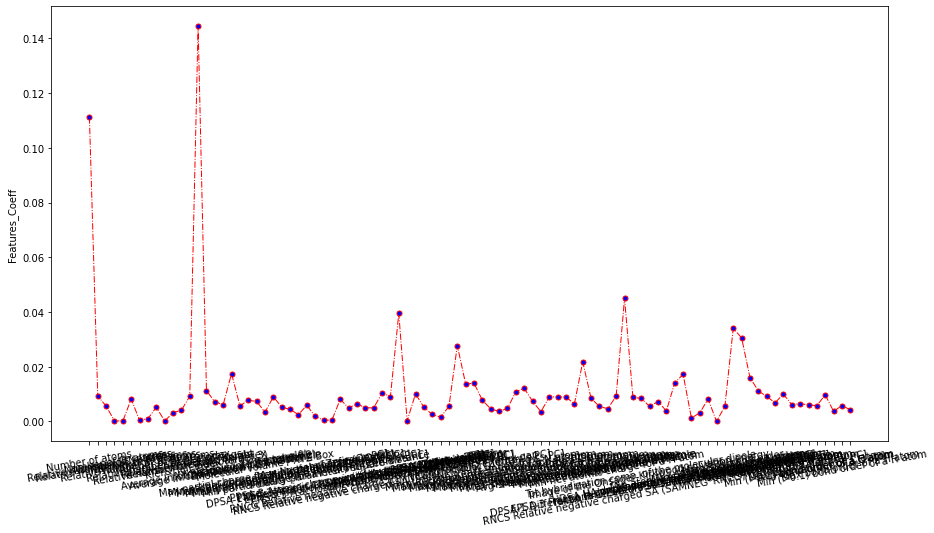

In [65]:
# Lets plot the coeff with features
num_features = 92 
plt.figure(figsize= (15, 8))
plt.plot(range(len(features)),importances, color='red', linestyle='dashdot', linewidth = 1,marker='o', 
         markerfacecolor='blue', markersize=5)
plt.xticks(range(len(features)),features,rotation=10)
plt.ylabel("Features_Coeff")
plt.show()